In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
import io
import seaborn as sns
import numpy as np
from scipy import stats
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing
from google.colab import files




In [2]:
uploadFile = files.upload()
df = pd.read_csv(io.BytesIO(uploadFile['avocado.csv']))
df.head()

Saving avocado.csv to avocado.csv


,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [3]:
df.describe().round(2)

,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,18249.00,18249.00,18249.00,18249.00,18249.00,18249.00,18249.00,18249.00,18249.00,18249.00,18249.00
mean,24.23,1.41,850644.01,293008.42,295154.57,22839.74,239639.20,182194.69,54338.09,3106.43,2016.15
std,15.48,0.40,3453545.36,1264989.08,1204120.40,107464.07,986242.40,746178.51,243965.96,17692.89,0.94
min,0.00,0.44,84.56,0.00,0.00,0.00,0.00,0.00,0.00,0.00,2015.00
25%,10.00,1.10,10838.58,854.07,3008.78,0.00,5088.64,2849.42,127.47,0.00,2015.00
50%,24.00,1.37,107376.76,8645.30,29061.02,184.99,39743.83,26362.82,2647.71,0.00,2016.00
75%,38.00,1.66,432962.29,111020.20,150206.86,6243.42,110783.37,83337.67,22029.25,132.50,2017.00
max,52.00,3.25,62505646.52,22743616.17,20470572.61,2546439.11,19373134.37,13384586.80,5719096.61,551693.65,2018.00


In [4]:
df.drop(['Unnamed: 0'],axis=1,inplace=True)
df['Date'] = pd.to_datetime(df['Date'])
df.set_index(['Date'],inplace=True)
df.sort_index(inplace=True)
df.head()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
Date,,,,,,,,,,,,
2015-01-04,1.75,27365.89,9307.34,3844.81,615.28,13598.46,13061.10,537.36,0.0,organic,2015,Southeast
2015-01-04,1.49,17723.17,1189.35,15628.27,0.00,905.55,905.55,0.00,0.0,organic,2015,Chicago
2015-01-04,1.68,2896.72,161.68,206.96,0.00,2528.08,2528.08,0.00,0.0,organic,2015,HarrisburgScranton
2015-01-04,1.52,54956.80,3013.04,35456.88,1561.70,14925.18,11264.80,3660.38,0.0,conventional,2015,Pittsburgh
2015-01-04,1.64,1505.12,1.27,1129.50,0.00,374.35,186.67,187.68,0.0,organic,2015,Boise


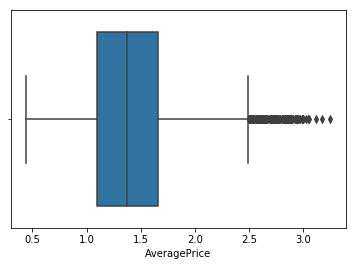

In [5]:
sns.boxplot(df['AveragePrice'])

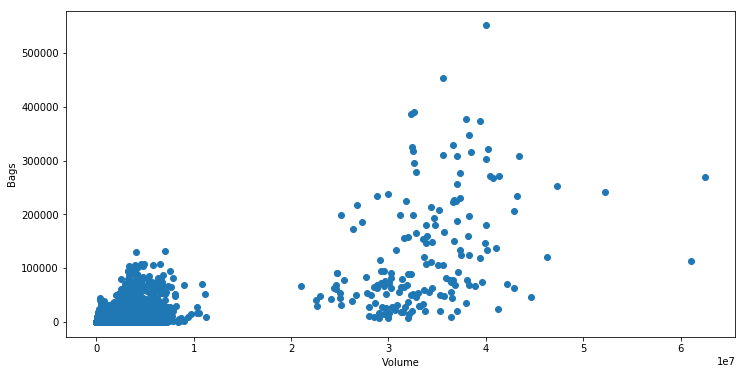

In [6]:
xlabel = [i for i in np.arange(0,3.5,0.5)]

fig,ax = plt.subplots(figsize=(12,6))

ax.scatter(df['Total Volume'],df['XLarge Bags'])
ax.set_xlabel('Volume')
ax.set_ylabel('Bags')
plt.show()

In [7]:
print('No of record that ==0:',df['XLarge Bags'].where(df['XLarge Bags'] ==0).count())
print('No of record that >2:',df['XLarge Bags'].where(df['XLarge Bags'] >2).count())

No of record that ==0: 12048
No of record that >2: 6142


In [8]:
z = np.abs(stats.zscore(df['XLarge Bags']))
print(z)

[0.17557961 0.17557961 0.17557961 ... 0.17557961 0.17557961 0.01135043]


In [9]:
threshold = 3
print(np.where(z>threshold))

(array([ 3500,  3538,  3891,  4094,  4327,  4419,  4774,  5258,  5454,
        5466,  5469,  5578,  5591,  5606,  5637,  5710,  5854,  5959,
        5998,  6007,  6071,  6141,  6161,  6201,  6256,  6364,  6585,
        6608,  6671,  6841,  7012,  7020,  7227,  7270,  7330,  7345,
        7512,  7650,  7661,  7696,  7753,  7804,  7906,  8018,  8033,
        8045,  8049,  8111,  8169,  8172,  8212,  8213,  8237,  8333,
        8368,  8385,  8438,  8446,  8447,  8485,  8498,  8517,  8579,
        8584,  8625,  8630,  8636,  8641,  8655,  8670,  8705,  8729,
        8751,  8772,  8794,  8867,  9020,  9178,  9205,  9329,  9500,
        9691,  9732,  9919,  9944, 10104, 10193, 10281, 10905, 10910,
       11022, 11201, 11328, 11376, 11472, 11593, 11665, 11855, 11966,
       12049, 12095, 12169, 12292, 12326, 12356, 12470, 12477, 12545,
       12549, 12712, 12733, 12816, 12821, 12852, 12869, 12936, 12955,
       12994, 13027, 13041, 13078, 13080, 13116, 13193, 13206, 13214,
       13255, 13359

In [0]:
outlier = list(np.where(z>threshold))

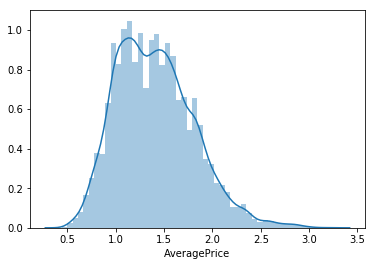

In [11]:
sns.distplot(df['AveragePrice'])

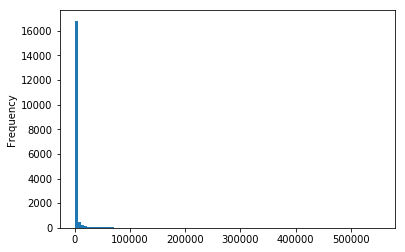

In [12]:
df['XLarge Bags'].plot.hist(bins=100)

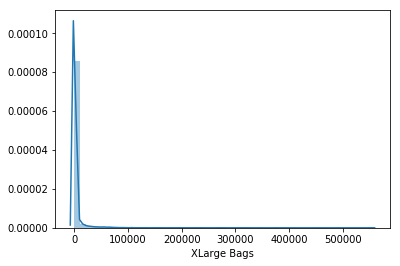

In [13]:
sns.distplot(df['XLarge Bags'])

In [14]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

AveragePrice         0.56
Total Volume    422123.71
4046            110166.13
4225            147198.08
4770              6243.42
Total Bags      105694.73
Small Bags       80488.25
Large Bags       21901.78
XLarge Bags        132.50
year                 2.00
dtype: float64


In [15]:
df2 = df.copy()
df2.shape

(18249, 12)

In [16]:
# Z-score clean
num_column = df.select_dtypes(include=['number'])
cat_column = df.select_dtypes(exclude=['number'])
z = np.all(stats.zscore(num_column) < 3 , axis=1)
df_clean = pd.concat([num_column.loc[z],cat_column.loc[z]], axis=1)
df_clean.shape

(17651, 12)

In [0]:
# IQR clean

idx = ~((num_column < (Q1 - 1.5 * IQR)) | (num_column > (Q3 + 1.5 * IQR))).any(axis=1)
df_clean = pd.concat([num_column.loc[idx], cat_column.loc[idx]], axis=1)

In [18]:
df_clean.shape

(11538, 12)

In [19]:
m = df.loc[:,'XLarge Bags'].where(df.loc[:,'XLarge Bags']>0).median()
m

1130.0

In [0]:
df_clean['XLarge Bags'] = df_clean['XLarge Bags'].replace(0.0,m)


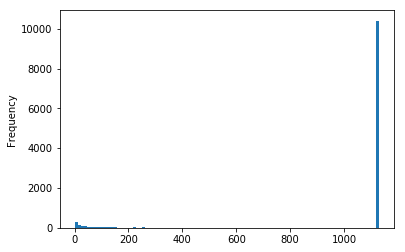

In [21]:
df_clean['XLarge Bags'].plot.hist(bins=100)

In [0]:
labelEncoder = LabelEncoder()

type_dict = {'organic':1,'conventional':2}
df_clean['type'] = df_clean['type'].map(type_dict)

In [0]:
df_clean = sklearn.utils.shuffle(df_clean)
X = df_clean.drop(['AveragePrice'],axis=1).values
y = df_clean['AveragePrice'].values

X[:,-1] = labelEncoder.fit_transform(X[:,-1])
X = preprocessing.scale(X)

In [24]:
test_size=2000

X_train = X[:-test_size]
y_train = y[:-test_size]

X_test = X[-test_size:]
y_test = y[-test_size:]

clf = LinearRegression()
clf.fit(X_train,y_train)

print(clf.score(X_test,y_test))

0.3086906953088935


In [0]:
#df_clean.drop('XLarge Bags',axis=1,inplace=True)

In [26]:
df_clean = sklearn.utils.shuffle(df_clean)

X = df_clean.drop(['AveragePrice','XLarge Bags'],axis=1).values
y = df_clean['AveragePrice'].values

X[:,-1] = labelEncoder.transform(X[:,-1])
X = preprocessing.scale(X)

test_size = 2000

X_train = X[:-test_size]
y_train = y[:-test_size]

X_test = X[-test_size:]
y_test = y[-test_size:]

clf.fit(X_train,y_train)

print(clf.score(X_test,y_test))

0.29526516863009755


In [60]:
for X,y in list(zip(X_test,y_test))[:20]:
  print('Predict: {0:.2f}  Actual: {1}  Difference: {2:5.2f}'.format(clf.predict([X])[0],y,(clf.predict([X])[0]) - y  ))

Predict: 1.63  Actual: 2.14  Difference: -0.51
Predict: 1.63  Actual: 1.69  Difference: -0.06
Predict: 1.32  Actual: 1.48  Difference: -0.16
Predict: 1.65  Actual: 2.09  Difference: -0.44
Predict: 1.66  Actual: 1.45  Difference:  0.21
Predict: 1.61  Actual: 1.89  Difference: -0.28
Predict: 1.69  Actual: 2.17  Difference: -0.48
Predict: 1.65  Actual: 1.72  Difference: -0.07
Predict: 1.62  Actual: 1.36  Difference:  0.26
Predict: 1.62  Actual: 1.87  Difference: -0.25
Predict: 1.65  Actual: 2.23  Difference: -0.58
Predict: 1.62  Actual: 1.23  Difference:  0.39
Predict: 1.17  Actual: 1.06  Difference:  0.11
Predict: 1.18  Actual: 1.04  Difference:  0.14
Predict: 1.63  Actual: 1.65  Difference: -0.02
Predict: 1.65  Actual: 0.96  Difference:  0.69
Predict: 1.65  Actual: 2.36  Difference: -0.71
Predict: 1.32  Actual: 1.59  Difference: -0.27
Predict: 1.72  Actual: 1.27  Difference:  0.45
Predict: 1.66  Actual: 1.48  Difference:  0.18


In [27]:
df_clean.head()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,type,region
Date,,,,,,,,,,,,
2017-03-05,1.42,20616.04,1137.22,8737.49,0.00,10741.33,736.02,10005.31,1130.00,2017,1,SanDiego
2017-10-29,1.41,70870.34,20428.73,21686.72,276.93,28477.96,23106.36,5310.69,60.91,2017,2,Spokane
2018-03-11,1.80,3447.36,98.90,926.28,0.00,2422.18,664.03,1758.15,1130.00,2018,1,Boise
2017-02-26,1.05,143520.74,12328.78,30665.47,3.20,100523.29,87365.60,13157.69,1130.00,2017,1,LosAngeles
2015-11-08,1.40,4144.82,443.10,2827.56,0.00,874.16,413.97,460.19,1130.00,2015,1,Columbus


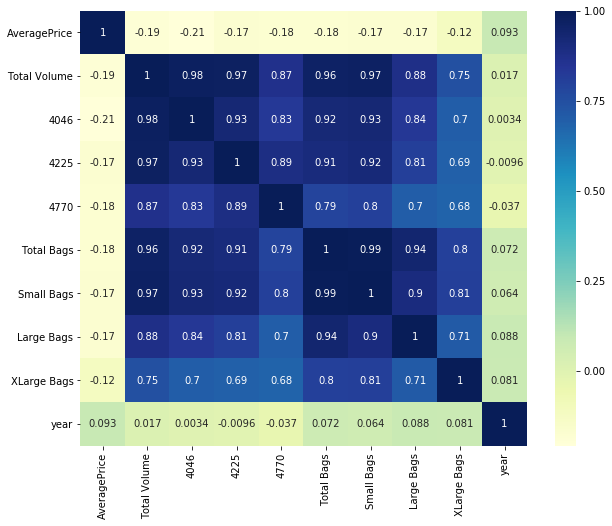

In [28]:
fig,ax = plt.subplots(1,1,figsize=(10,8))

corr = df.corr()

sns.heatmap(corr,cmap='YlGnBu',annot=True)
plt.show()